## Objetivo

Se busca crear un modelo que pueda predecir el porcentaje de no supervivencia de un arbol dependiendo de diferentes factores

Dataset obtenido de: https://www.kaggle.com/datasets/yekenot/tree-survival-prediction

Original: https://datadryad.org/stash/dataset/doi:10.5061/dryad.xd2547dpw

Descripcion de las columnas
- No: Número de identificación único de la plántula.
- Plot: Número de parcela de campo en la que se sembró la plántula (1-18).
- Subplot: Subparcela dentro de la parcela principal donde se plantó la plántula. Dividida en 5 subparcelas (1 por esquina, más 1 en el medio) (A-E).
- Species: Incluye Acer saccharum, Prunus serotina, Quercus alba y Quercus rubra.
- Light ISF: Nivel de luz cuantificado con el software HemiView. Representa la cantidad de luz que llega a cada subparcela a una altura de 1m.
- Light Cat: nivel de luz categórico creado al dividir el rango de valores Light_ISF en tres contenedores (bajo, medio, alto).
- Core: Año en que se retiró el núcleo del suelo del campo.
- Soil: Especie de la que se tomó el núcleo del suelo. Incluye todas las especies, más Acer rubrum, Populus grandidentata y un congénere esterilizado de cada especie.
- Adult: Árbol individual del que se tomó el suelo. Hasta 6 adultos por especie. Se utiliza como efecto aleatorio en los análisis.
- Sterile: Si el suelo fue esterilizado o no.
- Conspecific: si el suelo era conespecífico, heteroespecífico o conespecífico esterilizado.
- Myco: Tipo de micorriza de la especie de plántula (HMA o EMF).
- SoilMyco: Tipo de micorriza de la especie que cultiva el suelo (HMA o EMF).
- PlantDate: La fecha en que se plantaron las plántulas en las macetas de campo.
- AMF: Porcentaje de colonización de hongos micorrízicos arbusculares en las raíces finas de plántulas cosechadas.
- EMF: Porcentaje de colonización de hongos ectomicorrícicos en las puntas de las raíces de plántulas cosechadas.
- Phenolics: Calculados como nmol equivalentes de ácido gálico por mg de extracto seco (consulte el manuscrito para conocer los métodos detallados).
- NSC: Calculado como porcentaje de masa seca de carbohidratos no estructurales (consulte el manuscrito para conocer los métodos detallados).
- Lignin: calculada como porcentaje de masa seca de lignina (consulte el manuscrito para conocer los métodos detallados).
- Census: El número del censo en el que la plántula murió o fue cosechada.
- Time: El número de días en los que la plántula murió o fue cosechada.
- Event: Se utiliza para el análisis de supervivencia para indicar el estado de cada plántula individual en un momento dado, 0 = vivo, 1 = muerto
- Harvest: Indica si la plántula fue cosechada para medir el rasgo.
- Alive: Indica si la plántula estaba viva al final de la segunda temporada de crecimiento. "X" en este campo indica estado vivo.

## Analisis del dataset

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("../dataset/Tree_Data.csv")
print(dataset.shape)
dataset.head()

(2783, 24)


,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


In [4]:
dataset.loc[dataset["No"]==2823]

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
3,2823,7,D,Acer saccharum,0.08,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN


### Valores duplicados y nulos

In [5]:
print("Cantidad de valores duplicados: " + str((pd.DataFrame(dataset.duplicated())[0] == True).sum()))
print(".")
print("Cantidad de valores Nulos:")
dataset.isnull().sum()

Cantidad de valores duplicados: 0
.
Cantidad de valores Nulos:


No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64

Vemos que no hay valores duplicados, pero si valores nulos pero es por la naturaleza del cargado de datos. Es decir, en Harvest y Alive solo se tildaba si habia sido cosechata o si estaba vivo, en caso de que no no se tildaba (hay que modificarlo para que use 0 y 1); en EMF (cantidad de hongos) implicaria que no hay presencia (habria que reemplazarlo los NaN por 0). El unico valor extraño es el que figura en Event (que tendria que ser 0 o 1)

In [6]:
dataset.loc[dataset["Event"].isnull()]

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,16.99,22.51,4.28,19.38,21.36,33,115.5,NaN,NaN,NaN


In [7]:
# Faltar los datos objetivos, si vivio o murio, y al ser un unico dato vamos a eliminarlos

dataset_modif = dataset.dropna(subset=["Event"])

dataset_modif.shape


(2782, 24)

### Valores duplicados

- Event y Alive: Pareceria que miran la misma variable, si la planta llego viva al final de la observacion. Vamos a analizar si es la misma variable

In [8]:
dataset_Event_Alive = dataset_modif[["Event", "Alive"]]

dataset_Event_Alive.head()

,Event,Alive
0,1.0,NaN
1,0.0,X
2,1.0,NaN
3,1.0,NaN
4,1.0,NaN


In [9]:
#  Reemplazamos en Alive el NaN por 0 y el X por 1
dataset_Event_Alive.fillna(value={"Alive": 0}, inplace=True)
dataset_Event_Alive["Alive"].replace(to_replace='X', value = 1, inplace=True)

dataset_Event_Alive.head()

C:\Users\5p4c3\AppData\Local\Temp\ipykernel_4644\549811505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_Event_Alive.fillna(value={"Alive": 0}, inplace=True)
C:\Users\5p4c3\AppData\Local\Temp\ipykernel_4644\549811505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_Event_Alive["Alive"].replace(to_replace='X', value = 1, inplace=True)


,Event,Alive
0,1.0,0
1,0.0,1
2,1.0,0
3,1.0,0
4,1.0,0


In [10]:
# Ya que pareciera que cuando uno es 1 el otro es 0 y viseversa. 
# Si miran la misma variable, al multiplicar las columnas el resultado deberia ser 0

(dataset_Event_Alive["Event"] * dataset_Event_Alive["Alive"]).sum()

0.0

Al dar 0 implica que son la misma variable por lo que, vamos a eliminar la columna Alive del dataset (me quedo con event por que ya esta en 0 y 1)

- Census y Time: Miran la misma variable, cuanto tiempo duro la observacion. Vamos a eliminar Census y quedarnos con Time ya que parece mas significativa

- Light_ISF y Light_Cat: Miran la misma variable, cuanto luz recivio la planta. Vamos a eliminar Light_Cat (categorica) y quedarnos con Light_ISF (valor) ya que parece mas significativa

- Myco, SoilMyco, AMF ,EMF: miran el tipo y la cantidad de hongo presente en la raiz. Elimino Myco y SoilMyco ( que indican solo el tipo de hongo que aparece) y me quedo con  AMF y EMF (porcentajes)

Los valores NaN del EMF hay que pasarlos a 0


In [11]:
dataset_modif =  dataset_modif.drop(["Alive", "Census", "Light_Cat", "Myco", "SoilMyco"], axis= 1)

dataset_modif.fillna(value={"EMF": 0}, inplace=True)

dataset_modif.head()

,No,Plot,Subplot,Species,Light_ISF,Core,Soil,Adult,Sterile,Conspecific,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Time,Event,Harvest
0,126,1,C,Acer saccharum,0.106,2017,Prunus serotina,I,Non-Sterile,Heterospecific,6/11/18,22.00,0.00,-0.56,13.86,12.15,14.0,1.0,NaN
1,11,1,C,Quercus alba,0.106,2017,Quercus rubra,970,Non-Sterile,Heterospecific,5/25/18,15.82,31.07,5.19,20.52,19.29,115.5,0.0,NaN
2,12,1,C,Quercus rubra,0.106,2017,Prunus serotina,J,Non-Sterile,Heterospecific,5/31/18,24.45,28.19,3.36,24.74,15.01,63.0,1.0,NaN
3,2823,7,D,Acer saccharum,0.080,2016,Prunus serotina,J,Non-Sterile,Heterospecific,6/11/18,22.23,0.00,-0.71,14.29,12.36,14.0,1.0,NaN
4,5679,14,A,Acer saccharum,0.060,2017,Prunus serotina,689,Non-Sterile,Heterospecific,6/11/18,21.15,0.00,-0.58,10.85,11.20,14.0,1.0,NaN


### Valores que no aportan informacion relevante

- No, Plot, Subplot	: No, es un numero de identificacion; mientras que Plot y Subplot es la identificacion de donde fue plantado
- Core, Adult: uno es cuando se saco la tierra que se coloco en la maseta y el otro identificacion de donde salio la semilla
- Harvest: indica si la plata fue cosechada
- PlantDate: Si se analiza el dataset el momento de plantado es casi simultaneo, solo hay un mes de diferencia, por lo que no deberia impactar en los resultados

In [12]:
dataset_modif =  dataset_modif.drop(["No", "Plot",  "Subplot", "Core", "Adult", "Harvest", "PlantDate"], axis= 1)

dataset_modif.head()

,Species,Light_ISF,Soil,Sterile,Conspecific,AMF,EMF,Phenolics,Lignin,NSC,Time,Event
0,Acer saccharum,0.106,Prunus serotina,Non-Sterile,Heterospecific,22.00,0.00,-0.56,13.86,12.15,14.0,1.0
1,Quercus alba,0.106,Quercus rubra,Non-Sterile,Heterospecific,15.82,31.07,5.19,20.52,19.29,115.5,0.0
2,Quercus rubra,0.106,Prunus serotina,Non-Sterile,Heterospecific,24.45,28.19,3.36,24.74,15.01,63.0,1.0
3,Acer saccharum,0.080,Prunus serotina,Non-Sterile,Heterospecific,22.23,0.00,-0.71,14.29,12.36,14.0,1.0
4,Acer saccharum,0.060,Prunus serotina,Non-Sterile,Heterospecific,21.15,0.00,-0.58,10.85,11.20,14.0,1.0


*Aclaracion respecto a AMF, EMF, Phenolics, Lignin y NSC: estos valores no se puede obtener a priori, hay que retirar la planta del suelo y analizarla. Lo que se podria hacer es un estudio previo, plantar varios brotes y retirarlo para obtener estos valores y usar este modelo*

In [13]:
dataset_modif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2782 entries, 0 to 2782
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      2782 non-null   object 
 1   Light_ISF    2782 non-null   float64
 2   Soil         2782 non-null   object 
 3   Sterile      2782 non-null   object 
 4   Conspecific  2782 non-null   object 
 5   AMF          2782 non-null   float64
 6   EMF          2782 non-null   float64
 7   Phenolics    2782 non-null   float64
 8   Lignin       2782 non-null   float64
 9   NSC          2782 non-null   float64
 10  Time         2782 non-null   float64
 11  Event        2782 non-null   float64
dtypes: float64(8), object(4)
memory usage: 282.5+ KB


### Correlaciones entre variable

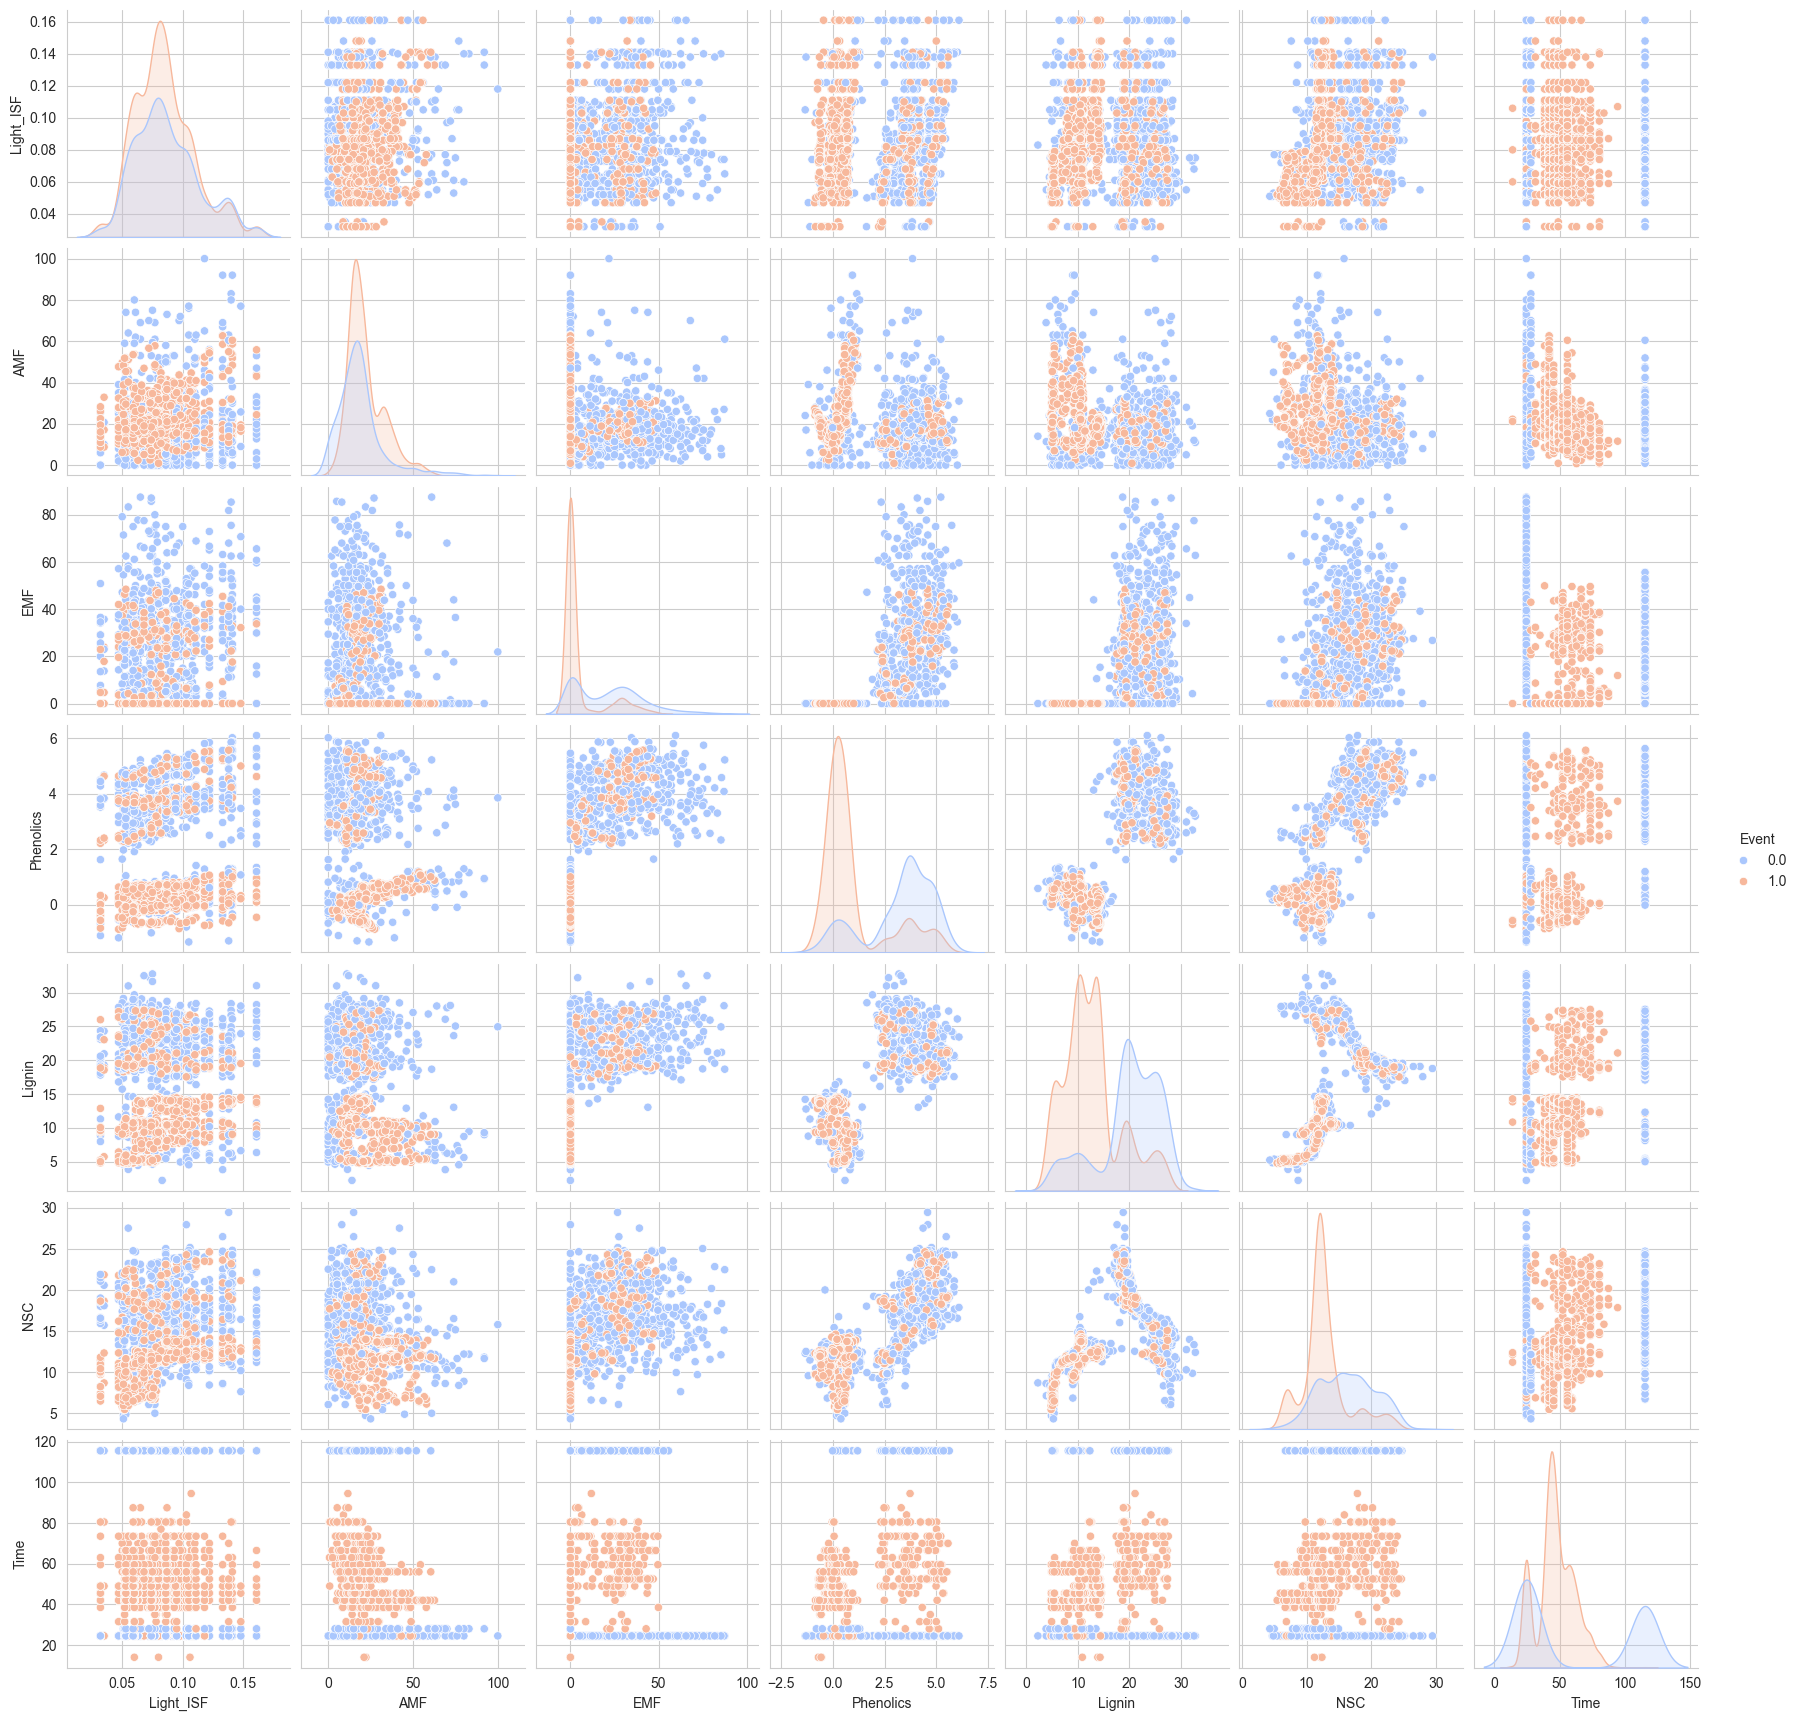

In [14]:
sns.set_style("whitegrid")
sns.pairplot(data= dataset_modif[["Light_ISF", "AMF", "EMF", "Phenolics", "Lignin",  "NSC", "Time", "Event"]],
              hue="Event", 
              palette='coolwarm')

En el Time, todos los que se mantuvieron vivos estan abajo o arriba de la escala. Esto es por como se realizo el analisis: se tomaba una muestra a los 21 dias, por ello la concetracion abajo, y el estudio se dio por terminado a los 115 dias, quedando solo las que sobrevivieron, por ello la concetracion arriba, el resto fue muriendo antes. Lo mejor sera eliminar la columna Time

In [15]:
dataset_modif =  dataset_modif.drop(["Time"], axis= 1)

dataset_modif.head()

,Species,Light_ISF,Soil,Sterile,Conspecific,AMF,EMF,Phenolics,Lignin,NSC,Event
0,Acer saccharum,0.106,Prunus serotina,Non-Sterile,Heterospecific,22.00,0.00,-0.56,13.86,12.15,1.0
1,Quercus alba,0.106,Quercus rubra,Non-Sterile,Heterospecific,15.82,31.07,5.19,20.52,19.29,0.0
2,Quercus rubra,0.106,Prunus serotina,Non-Sterile,Heterospecific,24.45,28.19,3.36,24.74,15.01,1.0
3,Acer saccharum,0.080,Prunus serotina,Non-Sterile,Heterospecific,22.23,0.00,-0.71,14.29,12.36,1.0
4,Acer saccharum,0.060,Prunus serotina,Non-Sterile,Heterospecific,21.15,0.00,-0.58,10.85,11.20,1.0


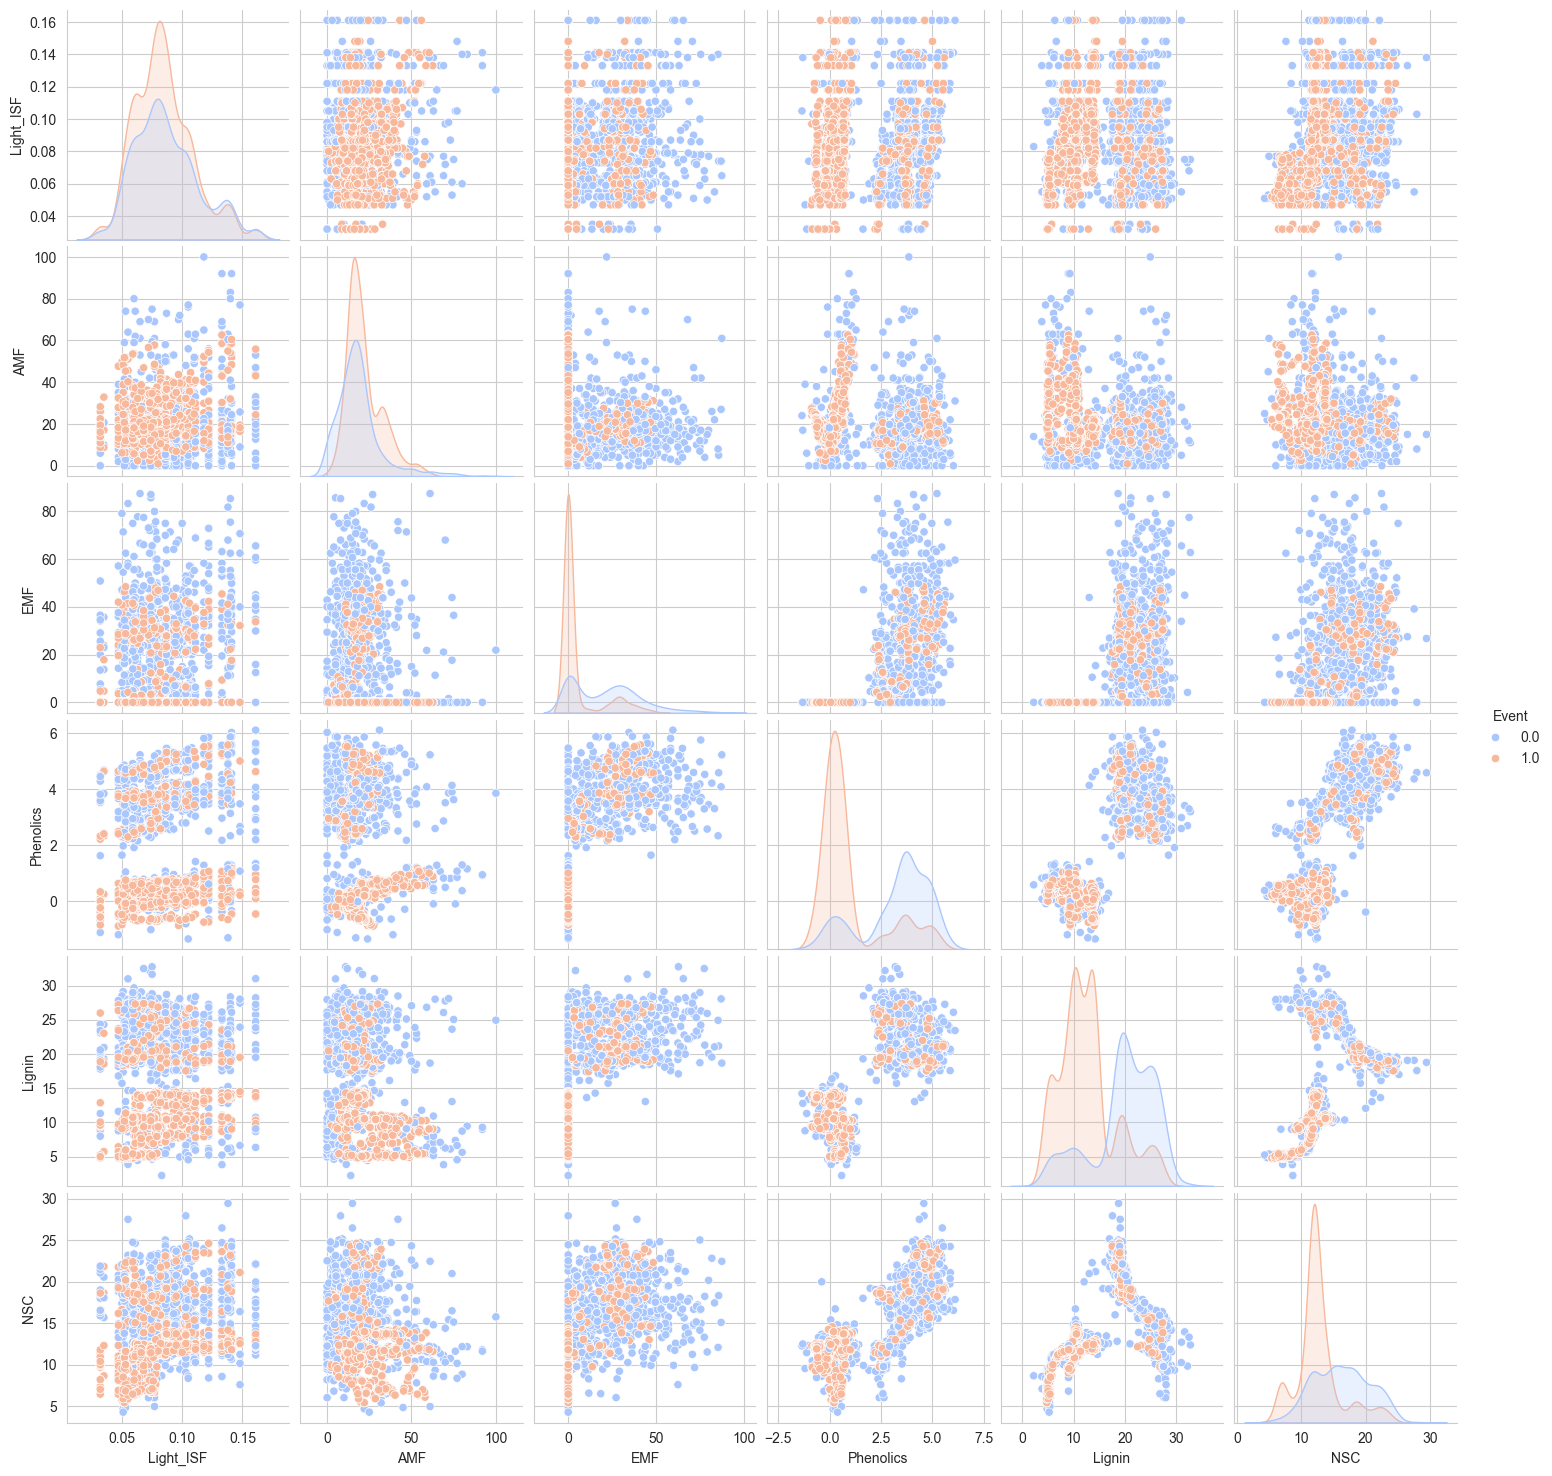

In [16]:
sns.pairplot(data= dataset_modif[["Light_ISF", "AMF", "EMF", "Phenolics", "Lignin",  "NSC", "Event"]],
              hue="Event", 
              palette='coolwarm')

In [32]:
# variables categoricas

dataset_modif_categoricas = dataset_modif[["Species", "Soil", "Sterile", "Conspecific","Event"]]

dataset_modif_categoricas

,Species,Soil,Sterile,Conspecific,Event
0,Acer saccharum,Prunus serotina,Non-Sterile,Heterospecific,1.0
1,Quercus alba,Quercus rubra,Non-Sterile,Heterospecific,0.0
2,Quercus rubra,Prunus serotina,Non-Sterile,Heterospecific,1.0
3,Acer saccharum,Prunus serotina,Non-Sterile,Heterospecific,1.0
4,Acer saccharum,Prunus serotina,Non-Sterile,Heterospecific,1.0
...,...,...,...,...,...
2777,Quercus alba,Quercus rubra,Non-Sterile,Heterospecific,1.0
2778,Prunus serotina,Populus grandidentata,Non-Sterile,Heterospecific,1.0
2779,Quercus alba,Acer rubrum,Non-Sterile,Heterospecific,1.0
2780,Quercus alba,Quercus rubra,Non-Sterile,Heterospecific,1.0


In [41]:
# vamos a crear una funcion que devuelva que tan bien distribuidas (con desviacion standar) esta cada variable categorica
import numpy as np

def distribucion_datos(variables_categoricas: pd.DataFrame) -> None:
    for columna in variables_categoricas.columns.values:
        print(columna +": "+ str(round(np.std(variables_categoricas[columna].value_counts() /len(variables_categoricas.index)),3)))


In [45]:

distribucion_datos(dataset_modif_categoricas)

Species: 0.021
Soil: 0.005
Sterile: 0.348
Conspecific: 0.266
Event: 0.07


In [46]:
# Species y Soil posee valores cercanos a cero (hay cantidades similares de cada categoria en cada  variable)
# la variable objetivo, Event, tambien posee buena distribucion
# vamos a ver mas detalles de Sterile y Conspecific

print(dataset_modif_categoricas["Sterile"].value_counts())
print(".")
print(dataset_modif_categoricas["Conspecific"].value_counts())

Sterile
Non-Sterile    2360
Sterile         422
Name: count, dtype: int64
.
Conspecific
Heterospecific    1974
Sterilized         422
Conspecific        386
Name: count, dtype: int64


Para el caso de Sterile y Conspecific, hay mas cantidad de valores para un tipo de categoria que de otra pero pareceria aceptable

### Conclusion

Del analisis previo se determino que el dataset se analizara en base a las siguientes variables:

In [47]:
dataset_modif.columns.values

array(['Species', 'Light_ISF', 'Soil', 'Sterile', 'Conspecific', 'AMF',
       'EMF', 'Phenolics', 'Lignin', 'NSC', 'Event'], dtype=object)

Siendo la variable objetivo __Event__